### 학습목표
1. beautifulsoup 모듈 사용하기
2. id, class 속성으로 tag 찾기
3. CSS를 이용하여 tag 찾기
4. 속성 값으로 tag 찾기
5. 정규표현식으로 tag 찾기
6. 개발자도구를 이용하여 동적으로 로딩되는 데이터 추출하기

In [2]:
import requests
from bs4 import BeautifulSoup

#### 다음 뉴스 데이터 추출
 - 뉴스기사에서 제목, 작성자, 작성일
 , 댓글 개수 추출
 - [뉴스링크](https://news.v.daum.net/v/20190728165812603)
 - tag를 추출할때는 가장 그 tag를 쉽게 특정할 수 있는 속성을 사용
  - id의 경우 원칙적으로 한 html 문서 내에서 유일
  

In [3]:
url = 'https://news.v.daum.net/v/20190728165812603'
resp = requests.get(url)
resp.text

'<!doctype html>\n<html lang="ko">\n <head> \n  <meta charset="utf-8"> \n  <meta http-equiv="X-UA-Compatible" content="IE=Edge"> \n  <meta name="referrer" content="always"> \n  <title>일론머스크 "테슬라에서 넷플릭스·유튜브 즐길 날 온다" | Daum 뉴스</title> \n  <link rel="shortcut icon" href="//m2.daumcdn.net/img-media/2010ci/Daum_favicon.ico"> \n  <style>\n@charset "utf-8";@font-face{font-family:\'Nanum Myeongjo\';font-style:normal;font-weight:400;src:url(//t1.daumcdn.net/media/news/news2016/font/NanumMyeongjo-Regular.eot);src:url(//t1.daumcdn.net/media/news/news2016/font/NanumMyeongjo-Regular.eot?#iefix) format(\'embedded-opentype\'),url(//t1.daumcdn.net/media/news/news2016/font/NanumMyeongjo-Regular.woff2) format(\'woff2\'),url(//t1.daumcdn.net/media/news/news2016/font/NanumMyeongjo-Regular.woff) format(\'woff\'),url(//t1.daumcdn.net/media/news/news2016/font/NanumMyeongjo-Regular.ttf) format(\'truetype\')}body,div,dl,dt,dd,ul,ol,li,h1,h2,h3,h4,h5,h6,pre,code,form,fieldset,legend,textarea,p,blockquote,th,td,

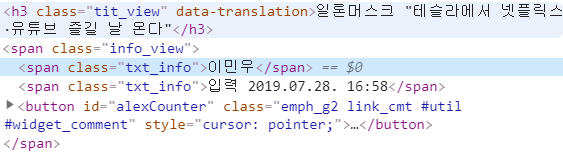

In [4]:
# 제목 가져오기
url = 'https://news.v.daum.net/v/20190728165812603'

soup = BeautifulSoup(resp.text)
title = soup.find('h3', class_="tit_view")
title.get_text()

'일론머스크 "테슬라에서 넷플릭스·유튜브 즐길 날 온다"'

In [8]:
# 작성일 찾기 : 부모 객체를 먼저 찾고, 그 안에서 자식 찾기
info = soup.find('span', class_='info_view')
info.find_all('span', class_='txt_info')[0]  # 인덱싱으로 2번째 것 찾음

<span class="info_view"> <span class="txt_info">이민우</span> <span class="txt_info">입력 2019.07.28. 16:58</span> <button class="emph_g2 link_cmt" id="alexCounter">댓글 <span class="alex-count-area">0</span>개</button> </span>

* id, class 속성으로 tag 찾기
 - 참고로 ID는 HTML 문서 내에서 보통 단 1개뿐, 고유의 값이라는 의미
 - 타이틀
 - 작성자, 작성일

In [108]:
title_view = soup.find('div', id='cSub')
print('Title : ',title_view.find_all('h3')[0].get_text())
print('reporter & date : ', title_view.find_all('span')[1].get_text(),
      " || ",title_view.find_all('span')[2].get_text())

Title :  일론머스크 "테슬라에서 넷플릭스·유튜브 즐길 날 온다"
reporter & date :  이민우  ||  입력 2019.07.28. 16:58


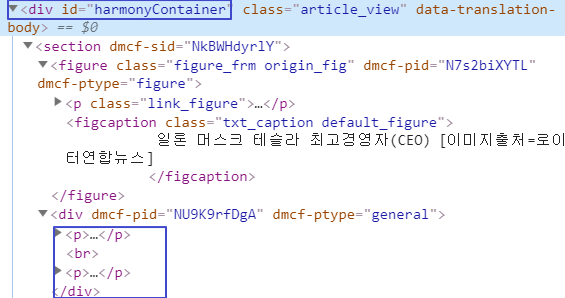

In [111]:
# 큰 박스(부모) 안에서 해당하는 본문들 출력하기
container = soup.find('div', id="harmonyContainer")
contents = ''

for p in container.find_all('p'):
    contents += p.get_text()
print(contents)

[아시아경제 이민우 기자] 일론 머스크 테슬라 최고경영자(CEO)가 자사 전기 자동차 모델에 넷플릭스와 유튜브 등 온라인동영상서비스(OTT)를 탑재할 것이라고 예고했다. 단순히 자율 주행 전기차가 단순히 주행을 위한 정보를 알려주는 것을 넘어 각종 영상 콘텐츠를 즐기는 공간으로도 확장하겠다는 전략으로 풀이된다.27일(현지시간) 더버지 등 주요 외신들에 따르면 머스크 CEO는 자신의 트위터를 통해 이 같은 계획을 밝혔다. 그는 "자동차가 정차했을 때 넷플릭스와 유튜브를 감상할 수 있는 기능이 조만간 추가될 것"이라며 "편안한 좌석과 서라운드 사운드 오디오를 통해 영화관과 같은 느낌을 받을 수 있을 것"이라고 강조했다.테슬라가 이처럼 콘텐츠 방면으로 확장하려 든 것은 이번이 처음이 아니다. 지난달 세계 최대 게임쇼 E3에서는 이미 운전자가 '폴아웃 쉘터'라는 게임을 할 수 있을 것이라고 발표한 바 있다. 이후에도 최근 게임업체 아타리사(社)의 자동차 경주 게임 ‘폴포지션’, 슈팅게임 ‘템페스트’, ‘미사일커맨드’ 등 고전 게임을 제공하기도 했다. 운전대로 게임을 조작하는 방식으로, 차가 주차돼 있을 경우에만 즐길 수 있다.이번 영상 콘텐츠는 주행 중에도 감상할 수 있도록 하는 방안을 고려하고 있다. 테슬라 측은 규제당국이 자율주행에 대해 완전히 승인하면 차량이 움직일 때에도 승객이 동영상을 즐길 수 있을 것이라고 설명했다.하지만 아직까지 자율주행차의 안전에 대한 우려는 완전히 걷혀지지 않은 상황이다. 지난 2017년 차량공유 서비스 우버의 자율주행 시범차량이 보행자와 충돌한 사고가 발생한 바 있다. 게다가 당시 시험 운전자는 디즈니의 동영상 스트리밍 서비스인 '훌루'를 이용하고 있던 것으로 밝혀졌다.이민우 기자 letzwin@asiae.co.kr


* CSS를 이용하여 tag 찾기
 - select, select_one함수 사용 >> list 형태로 값 반환
 - css selector 사용법
   - 태그명 찾기 tag 
   - 자손 태그 찾기 - 자손 관계 (tag tag) tag 사이에 **<<띄어쓰기>>**가 들어감
   - 자식 태그 찾기 - 다이렉트 자식 관계 (tag > tag)
   - 아이디 찾기 #id
   - 클래스 찾기 .class
   - 속성값 찾기 [name='test']
     - 속성값 prefix 찾기 [name ^='test'] : 앞 문자에 해당하는 걸 찾기 
     - 속성값 suffix 찾기 [name $='test'] : 끝 문자에 해당하는 걸 찾기
     - 속성값 substring 찾기 [name *='test] : 해당 문자가 들어간 걸 찾기
   - n번째 자식 tag 찾기 :nth-child(n) : nth-child(숫자) 인덱싱 기능인데,   
   어차피 select 메소드는 리스트로 반환되기 때문에 [:]로 인덱싱 하는게 편해보임

In [114]:
soup.select('h3')[:]

[<h3 class="tit_view" data-translation="">일론머스크 "테슬라에서 넷플릭스·유튜브 즐길 날 온다"</h3>,
 <h3 class="txt_newsview">포토&amp;TV</h3>,
 <h3 class="txt_newsview">실시간 이슈</h3>,
 <h3 class="txt_newsview">이 시각 추천뉴스</h3>,
 <h3 class="txt_newsview">실시간 주요이슈</h3>]

In [130]:
print('# 이 ID>> ',soup.select('#harmonyContainer')) 
# print('# 앞에 tag를 붙여주면 해당 태그의 아이디>> ',soup.select('div#harmonyContainer'))
      
# ID = # 을 의미한다. 
# soup.select('div', id='harmonyContainer') 와 다르다!!

# 이 ID>>  [<div class="article_view" data-translation-body="" id="harmonyContainer">
<section dmcf-sid="NkBWHdyrlY">
<figure class="figure_frm origin_fig" dmcf-pid="N7s2biXYTL" dmcf-ptype="figure">
<p class="link_figure"><img alt="일론 머스크 테슬라 최고경영자(CEO) [이미지출처=로이터연합뉴스]" class="thumb_g_article" dmcf-mid="NBMY3ZZhN4" dmcf-mtype="image" height="366" src="https://t1.daumcdn.net/news/201907/28/akn/20190728165813230vjsq.jpg" width="550"/></p>
<figcaption class="txt_caption default_figure">
           일론 머스크 테슬라 최고경영자(CEO) [이미지출처=로이터연합뉴스]
          </figcaption>
</figure>
<div dmcf-pid="NU9K9rfDgA" dmcf-ptype="general">
<p>[아시아경제 이민우 기자] 일론 머스크 테슬라 최고경영자(CEO)가 자사 전기 자동차 모델에 넷플릭스와 유튜브 등 온라인동영상서비스(OTT)를 탑재할 것이라고 예고했다. 단순히 자율 주행 전기차가 단순히 주행을 위한 정보를 알려주는 것을 넘어 각종 영상 콘텐츠를 즐기는 공간으로도 확장하겠다는 전략으로 풀이된다.</p>
<br/>
<p>27일(현지시간) 더버지 등 주요 외신들에 따르면 머스크 CEO는 자신의 트위터를 통해 이 같은 계획을 밝혔다. 그는 "자동차가 정차했을 때 넷플릭스와 유튜브를 감상할 수 있는 기능이 조만간 추가될 것"이라며 "편안한 좌석과 서라운드 사운드 오디오를 통해 영화관과 같은 느낌을 받을 수 있을 것"이라고 강조했다.</p>
</div>
<fi

In [138]:
# ID가 할머니컨테이너 인 것에서 (띄어쓰기) p tag를 찾아라
# 이때 p tag는 div의 자손 tag라서 띄어쓰기를 사용
soup.select('#harmonyContainer p')

[]

In [140]:
soup.select('#cSub h3')

[<h3 class="tit_view" data-translation="">일론머스크 "테슬라에서 넷플릭스·유튜브 즐길 날 온다"</h3>]

In [162]:
# class는 .클래스명 으로 찾음
soup.select('.txt_info')

[<span class="txt_info">이민우</span>,
 <span class="txt_info">입력 2019.07.28. 16:58</span>]

In [146]:
soup.select('.head_view')

[<div class="head_view">
 <em class="info_cp"> <a class="link_cp #body #cplogo" href="https://www.asiae.co.kr" target="_blank"> <img alt="아시아경제" class="thumb_g" src="https://t1.daumcdn.net/media/news/news2016/cp/cp_akn.gif"/> </a> </em>
 <h3 class="tit_view" data-translation="">일론머스크 "테슬라에서 넷플릭스·유튜브 즐길 날 온다"</h3>
 <span class="info_view"> <span class="txt_info">이민우</span> <span class="txt_info">입력 2019.07.28. 16:58</span> <button class="emph_g2 link_cmt" id="alexCounter">댓글 <span class="alex-count-area">0</span>개</button> </span>
 <div class="util_view">
 <!-- 2018-08-31-v2 버튼 순서 변경 / 자동요약 - TTS - 번역 - 공유 - 글씨크기 - 인쇄 순 -->
 <!-- 자동요약 -->
 <div class="btn_util util_summary">
 <!-- btn_summary 클릭시, layer_open 클래스 추가 -->
 <button aria-expanded="false" class="btn_summary #btn_summary" type="button"><span class="ico_newsview">자동요약</span></button>
 <div class="wrap_setlayer">
 <div class="layer_util layer_summary">
 <p>일론 머스크 테슬라 최고경영자(CEO)가 자사 전기 자동차 모델에 넷플릭스와 유튜브 등 온라인동영상서비스(OTT)를 탑재할 것이라고

In [171]:
# 해당 문자가 앞에 있는 찾기 [속성명^='찾을문자'] 
# 전체적으로 따옴표가 2번 들어가므로 큰, 작은 따옴표를 잘 구분해야함 

soup.select("h3[class^='t']")

[<h3 class="tit_view" data-translation="">일론머스크 "테슬라에서 넷플릭스·유튜브 즐길 날 온다"</h3>,
 <h3 class="txt_newsview">포토&amp;TV</h3>,
 <h3 class="txt_newsview">실시간 이슈</h3>,
 <h3 class="txt_newsview">이 시각 추천뉴스</h3>,
 <h3 class="txt_newsview">실시간 주요이슈</h3>]

In [175]:
# 해당 문자가 뒤에 있는 거 찾기 [속성명$="찾을 문자"]

soup.select('h3[class$="sview"]')

[<h3 class="txt_newsview">포토&amp;TV</h3>,
 <h3 class="txt_newsview">실시간 이슈</h3>,
 <h3 class="txt_newsview">이 시각 추천뉴스</h3>,
 <h3 class="txt_newsview">실시간 주요이슈</h3>]

In [186]:
# 해당 문자가 들어간 것 찾기 [속성명*="찾을 문자"]

soup.select('[class*="info"]')

[<em class="info_cp"> <a class="link_cp #body #cplogo" href="https://www.asiae.co.kr" target="_blank"> <img alt="아시아경제" class="thumb_g" src="https://t1.daumcdn.net/media/news/news2016/cp/cp_akn.gif"/> </a> </em>,
 <span class="info_view"> <span class="txt_info">이민우</span> <span class="txt_info">입력 2019.07.28. 16:58</span> <button class="emph_g2 link_cmt" id="alexCounter">댓글 <span class="alex-count-area">0</span>개</button> </span>,
 <span class="txt_info">이민우</span>,
 <span class="txt_info">입력 2019.07.28. 16:58</span>,
 <span class="info_summary"><span class="ico_newsview"></span>기사 제목과 주요 문장을 기반으로 자동요약한 결과입니다. 전체 맥락을 이해하기 위해서는 본문 보기를 권장합니다.</span>,
 <span class="info_cp">해당 언론사로 연결됩니다.</span>,
 <span class="info_aside">2019.08.06. 19:01 기준</span>,
 <a class="link_info" href="http://media.daum.net/info/intro.html">다음뉴스 소개</a>,
 <a class="link_info" href="http://media.daum.net/info/notice/">공지사항</a>,
 <a class="link_info" href="http://media.daum.net/info/bbsrule.html">게시판 운영원칙</a>,
 <a c

In [199]:
# n번째 인덱싱으로 찾기
print('nth-child 사용 >> ', soup.select('.txt_info:nth-child(1)'))
print('nth-child 사용 >> ', soup.select('.txt_info:nth-child(2)'))
print('nth-child는 각 리스트로 반환하네?')

print()
print('그냥 인덱싱 사용 >> ', soup.select('.txt_info')[0])
print('그냥 인덱싱 사용 >> ', soup.select('.txt_info')[1])

nth-child 사용 >>  [<span class="txt_info">이민우</span>]
nth-child 사용 >>  [<span class="txt_info">입력 2019.07.28. 16:58</span>]
nth-child는 각 리스트로 반환하네?

그냥 인덱싱 사용 >>  <span class="txt_info">이민우</span>
그냥 인덱싱 사용 >>  <span class="txt_info">입력 2019.07.28. 16:58</span>


* 정규표현식으로 tag 찾기
    - re.compile('정규표현식') 으로 사용

In [200]:
import re

In [206]:
print(soup.find_all('h1'))
print()
soup.find_all(re.compile('h\d'))

[<h1> <a class="link_daum" href="https://www.daum.net/"> <img alt="Daum" class="thumb_g" height="19" src="//t1.daumcdn.net/media/news/news2016/retina/logo_daum.jpg" width="45"/> </a> <a href="https://media.daum.net/" id="kakaoServiceLogo"><span class="ir_wa">뉴스</span></a> </h1>]



[<h1> <a class="link_daum" href="https://www.daum.net/"> <img alt="Daum" class="thumb_g" height="19" src="//t1.daumcdn.net/media/news/news2016/retina/logo_daum.jpg" width="45"/> </a> <a href="https://media.daum.net/" id="kakaoServiceLogo"><span class="ir_wa">뉴스</span></a> </h1>,
 <h2 class="screen_out">검색</h2>,
 <h2 class="screen_out">뉴스 메인메뉴</h2>,
 <h2 class="screen_out" id="kakaoBody">IT</h2>,
 <h3 class="tit_view" data-translation="">일론머스크 "테슬라에서 넷플릭스·유튜브 즐길 날 온다"</h3>,
 <h3 class="txt_newsview">포토&amp;TV</h3>,
 <h3 class="txt_newsview">실시간 이슈</h3>,
 <h3 class="txt_newsview">이 시각 추천뉴스</h3>,
 <h3 class="txt_newsview">실시간 주요이슈</h3>,
 <h2 class="tit_direct">바로가기</h2>,
 <h2 class="screen_out">서비스 이용정보</h2>]

In [224]:
#img 이름을 가진 tag가 많이 나옴
soup.find_all('img')[:5]

[<img alt="Daum" class="thumb_g" height="19" src="//t1.daumcdn.net/media/news/news2016/retina/logo_daum.jpg" width="45"/>,
 <img alt="아시아경제" class="thumb_g" src="https://t1.daumcdn.net/media/news/news2016/cp/cp_akn.gif"/>,
 <img alt="일론 머스크 테슬라 최고경영자(CEO) [이미지출처=로이터연합뉴스]" class="thumb_g_article" dmcf-mid="NBMY3ZZhN4" dmcf-mtype="image" height="366" src="https://t1.daumcdn.net/news/201907/28/akn/20190728165813230vjsq.jpg" width="550"/>,
 <img alt="(출처=일론 머스크 트위터 계정 캡쳐)" class="thumb_g_article" dmcf-mid="NRhnb5SRpx" dmcf-mtype="image" height="352" src="https://t1.daumcdn.net/news/201907/28/akn/20190728165813670hwxf.png" width="550"/>,
 <img alt="[렌즈 속 세상] 히로시마 원폭 74주년, 평화의 길 묻는다" class="thumb_g" src="https://img1.daumcdn.net/thumb/S288x280.q70/?fname=https://t1.daumcdn.net/news/201908/06/dt/20190806183139110npli.jpg"/>]

In [216]:
print(soup.find_all('img', attrs={"src":".png"}))  
# 딕셔너리는 정확히 일치해야하므로 .png로는 아무것도 안나옴
print('위 코드는 출력 되는 게 없음')
soup.find_all('img', attrs={'src':re.compile('.+\.png')})
#dict 내 key 값에 re.compile("정규식")을 통해서 찾아내는 코드

[]
위 코드는 없음


[<img alt="(출처=일론 머스크 트위터 계정 캡쳐)" class="thumb_g_article" dmcf-mid="NRhnb5SRpx" dmcf-mtype="image" height="352" src="https://t1.daumcdn.net/news/201907/28/akn/20190728165813670hwxf.png" width="550"/>]

In [228]:
soup.find_all('h3', class_=re.compile('.+view'))

[<h3 class="tit_view" data-translation="">일론머스크 "테슬라에서 넷플릭스·유튜브 즐길 날 온다"</h3>,
 <h3 class="txt_newsview">포토&amp;TV</h3>,
 <h3 class="txt_newsview">실시간 이슈</h3>,
 <h3 class="txt_newsview">이 시각 추천뉴스</h3>,
 <h3 class="txt_newsview">실시간 주요이슈</h3>]